# Realtime flow forecast with ECCC weather forecasts

This notebook shows how to perform a streamflow forecast, using ECCC weather forecasts. Generates the forecasts and plots them.

In [1]:
%matplotlib inline
# This entire section is cookie-cutter template to allow calling the servers and instantiating the connection
# to the WPS server. Do not modify this block.
from urllib.request import urlretrieve
from birdy import WPSClient
from raven.tutorial import get_file
from pathlib import Path
import json
import os
import datetime as dt
import tempfile
import xarray as xr

# Set environment variable WPS_URL to "http://localhost:9099" to run on the default local server
url = os.environ.get("WPS_URL", "https://pavics.ouranos.ca/twitcher/ows/proxy/raven/wps")
wps = WPSClient(url)
tmp = Path(tempfile.mkdtemp())

<PreparedRequest [GET]>
<PreparedRequest [GET]>


In [2]:
# Define some of the catchment properties. Could also be replaced by a call to the properties WPS!
region_vector = str(get_file("watershed_vector/LSJ_LL.zip"))

basin_area = 44523.5
basin_longitude = -72.55
basin_latitude = 48.39
basin_elevation= 300.0

# Choose a hydrological model to use. We have 'HMETS', 'GR4JCN','MOHYSE' and 'HBVEC'.
hydromodel = 'GR4JCN'

# Since we've used GR4JCN, we need to provide that model's parameters.
gr4j_parameters = '0.529, -3.396, 407.29, 1.072, 16.9, 0.947'

nc_transforms = json.dumps({'tas': {'time_shift': -0.25},
                            'pr': {'time_shift': -0.25, 'deaccumulate':True}})

#Length of the desired forecast, in days
duration = 7 

# launch the hydrological realtime forecasting WPS
resp = wps.realtime_forecast(region_vector=region_vector,
                             latitude=basin_latitude,
                             longitude=basin_longitude,
                             area=basin_area, 
                             elevation=basin_elevation, 
                             forecast_model="GEPS", 
                             gr4jcn=gr4j_parameters,
                             duration=duration, 
                             rvc=str(TESTDATA['solution.rvc']), 
                             nc_spec=nc_transforms,  
                             rain_snow_fraction='RAINSNOW_DINGMAN')


<PreparedRequest [POST]>


In [3]:
# The model has run! We can get the response.
# With `asobj` set to False, only the reference to the output is returned in the response. 
# Setting `asobj` to True will retrieve the actual files and copy them locally. 
[hydrograph, storage, solution, diagnostics, rv ] = resp.get(asobj=True)


<PreparedRequest [GET]>
<PreparedRequest [GET]>
<PreparedRequest [GET]>
<PreparedRequest [GET]>
<PreparedRequest [GET]>


### And, for visual representation of the forecasts:

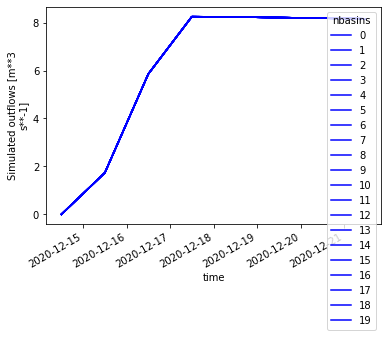

In [4]:
# This is to be replaced with a call to the forecast graphing WPS as soon as merged.
hydrograph.q_sim.plot.line('b',x='time')